# First steps with **apollinaire**

Let's assume that you want to use **apollinaire** to fit p-mode parameters for
a given star. First we need to import the package :

In [1]:
import apollinaire as apn
%matplotlib inline

The name of the stars we are going to work with is KIC6603624, also known as Saxo. The package include a version of the lightcurves calibrated following the KEPSEISMIC method (see García et al. 2014). 

Text(0, 0.5, 'Luminosity variation (ppm)')

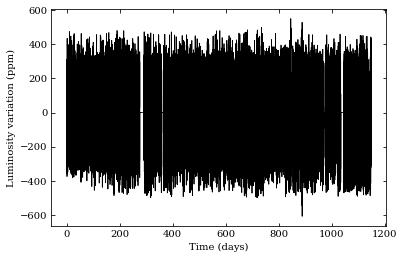

In [2]:
from astropy.io import fits
from os import path
import numpy as np
import matplotlib.pyplot as plt

modDir = path.abspath ('..')
filename = path.join (modDir, 'timeseries/kplr006603624_52_COR_filt_inp.fits')
hdu = fits.open (filename) [0]
data = np.array (hdu.data)
t = data[:,0]
v = data[:,1]

fig, ax = plt.subplots ()
ax.plot (t-t[0], v, color='black')

ax.set_xlabel ('Time (days)')
ax.set_ylabel ('Luminosity variation (ppm)')

Let's compute the psd of this lightcurve with the dedicated function:

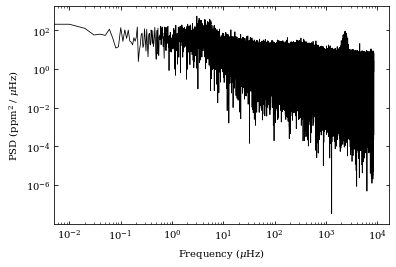

In [3]:
dt = np.median (t[1:] - t[:-1]) * 86400
freq, psd = apn.psd.series_to_psd (v, dt=dt, correct_dc=True)
freq = freq*1e6
psd = psd*1e-6

fig, ax = plt.subplots ()
ax.plot (freq, psd, color='black')
ax.set_xlabel (r'Frequency ($\mu$Hz)')
ax.set_ylabel (r'PSD (ppm$^2$ / $\mu$Hz)')
ax.set_yscale ('log')
ax.set_xscale ('log')

Here are the p-modes we want to fit :

Text(0, 0.5, 'PSD (ppm$^2$ / $\\mu$Hz)')

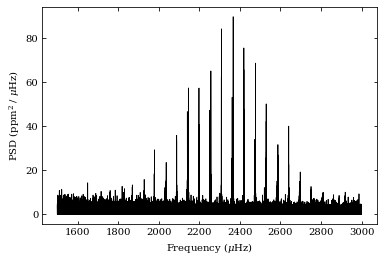

In [4]:
fig, ax = plt.subplots ()
cond = (freq>1500.)&(freq<3000.)
ax.plot (freq[cond], psd[cond], color='black')
ax.set_xlabel (r'Frequency ($\mu$Hz)')
ax.set_ylabel (r'PSD (ppm$^2$ / $\mu$Hz)')

We can also take a look at the echelle diagram of the modes. For this purpose, we have to know $\Delta\nu$, the large separation. An estimation of $\Delta\nu$ can be obtained through the scaling law, knowing mass and radius of the star (taken for example from the DR25 *Kepler* catalog, Mathur et al. 2017 or the Gaia-*Kepler* catalog, Berger et al. 2020). Here we want to have a nice plot, so let's cheat a little by taking a value which is closest to the $\Delta\nu$ we would obtain after performing the fit !

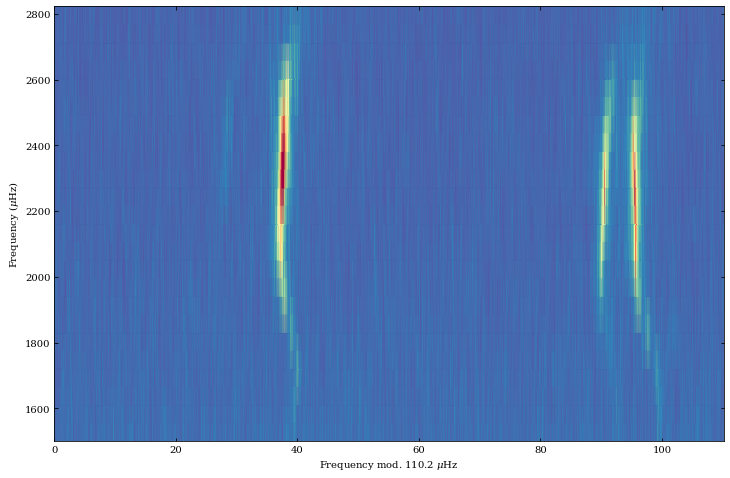

In [5]:
dnu = 110.2
ed = apn.psd.echelle_diagram (freq[cond], psd[cond], dnu, smooth=20, cmap='Spectral_r', 
                              shading='gouraud', vmax=0.2*np.amax (psd[cond]), vmin=2*np.amin (psd[cond]),
                              figsize=(12,8))

The main peakbagging tool provided by *apollinaire* is the `stellar_framework` function. It will successively fit the background of the star, the global pattern of the p-modes, and finally the individual parameters of the modes. Radius, mass and effective temperature are needed as input. 

In [6]:
r = 1.162
m = 1.027
teff = 5671
apn.peakbagging.stellar_framework (freq, psd, r, m, teff, n_harvey=2, low_cut=50., filename_back='background',
                                   filemcmc_back=None, nsteps_mcmc_back=2000, n_order=3, n_order_peakbagging=5, 
                                   filename_pattern='pattern', fit_l3=True,
                                   filemcmc_pattern=None, nsteps_mcmc_pattern=2000, parallelise=True, 
                                   quickfit=True, num=500, coeff_discard_pkb=5,
                                   progress=True, a2z_file='modes_param.a2z', 
                                   nsteps_mcmc_peakbagging=2000, filename_peakbagging='summary_peakbagging.pdf')

Dnu computed with scale law: 109.2 muHz
numax computed with scale law: 2340.0 muHz
Background model likelihood minimisation:
Optimization terminated successfully.


  0%|          | 0/2000 [00:00<?, ?it/s]

Beginning fit


/opt/miniconda3/envs/main-3.8/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 2000/2000 [01:46<00:00, 18.85it/s]


Global pattern likelihood minimisation:
Optimization terminated successfully.
Beginning fit


100%|██████████| 2000/2000 [03:55<00:00,  8.48it/s]


Orders to fit
[18 19 20 21 22]
Fitting on order 18
Window width: 96.1 muHz
Chain will be saved at: ./mcmc_sampler_order_18.h5


  0%|          | 0/2000 [00:00<?, ?it/s]

Ensemble sampling achieved
Fitting on order 19
Window width: 96.1 muHz
Chain will be saved at: ./mcmc_sampler_order_19.h5


  0%|          | 0/2000 [00:00<?, ?it/s]

Ensemble sampling achieved
Fitting on order 20
Window width: 96.1 muHz
Chain will be saved at: ./mcmc_sampler_order_20.h5


  0%|          | 0/2000 [00:00<?, ?it/s]

Ensemble sampling achieved
Fitting on order 21
Window width: 96.1 muHz
Chain will be saved at: ./mcmc_sampler_order_21.h5


  0%|          | 0/2000 [00:00<?, ?it/s]

Ensemble sampling achieved
Fitting on order 22
Window width: 96.1 muHz
Chain will be saved at: ./mcmc_sampler_order_22.h5


100%|██████████| 2000/2000 [04:45<00:00,  7.00it/s]


Ensemble sampling achieved
